In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib as mlp


### Q1)

In [7]:
data = pd.read_excel('reg2.xlsx')
data

,Hydrocarbon level,O2
0,0.99,90.01
1,1.02,89.05
2,1.15,91.43
3,1.29,93.74
4,1.46,96.73
5,1.36,94.45
6,0.87,87.59
7,1.23,91.77
8,1.55,99.42
9,1.40,93.65


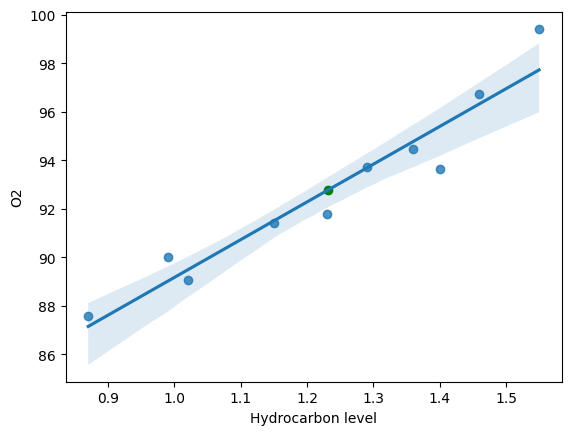

In [10]:
x = data['Hydrocarbon level']
y = data['O2']
plt.figure()
sns.regplot(x=x, y=y,fit_reg= True) #regression plot from seaborn
plt.scatter(np.mean(x), np.mean(y), color = "green")


### Q2)

In [5]:
tbl = pd.read_excel('regr.xlsx')
tbl

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


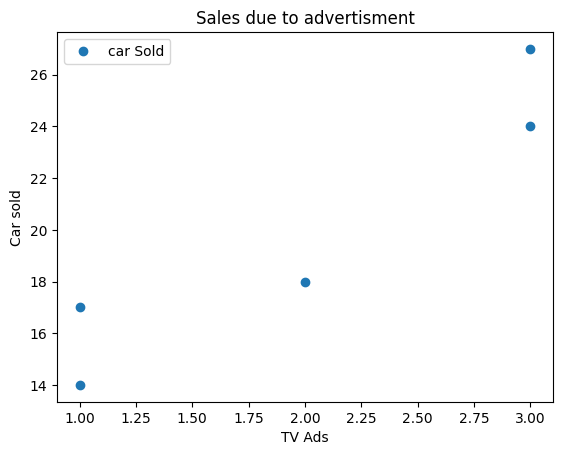

In [9]:
#making a scatter plot
tbl.plot('TV Ads','car Sold', style='o')
plt.ylabel('Car sold')
plt.title("Sales due to advertisment")
plt.show()

In [10]:
t = tbl['TV Ads']
c=tbl['car Sold']

In [21]:
import statsmodels.api as s

t = s.add_constant(t)
model1 = sm.OLS(c,t)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Wed, 12 Mar 2025   Prob (F-statistic):             0.0190
Time:                        04:03:35   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Q3)

In [7]:
data = pd.read_excel('Hardness.xlsx')
data 

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02
5,63.5,30.82
6,71.4,35.40
7,53.4,31.26
8,82.5,32.18
9,67.3,33.42


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [11]:
x = data['Hardness'].values.reshape(-1,1)
y = data['Tensile strength'].values.reshape(-1,1)
#reshape used to convert 1D array into 2D array
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=88)
#size = 0.2 -> size = 20%. 20% of the data is randomly chosen for testing, 

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

In [ ]:
#28 values used for training, remaining 7 for testing

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(x_train, y_train)

LinearRegression()

In [15]:
reg.intercept_

array([7.045691])

In [16]:
reg.coef_  

array([[1.99777401]])

In [18]:
y_predict = reg.predict(x_test)
y_predict

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

In [19]:
y_test

array([[67.3],
       [52.4],
       [64.3],
       [59.5],
       [69.2],
       [70.5],
       [82.7]])

In [ ]:
mean_squared_error(y_test, y_predict)
#SSE/n-1 
#the lesser the better

35.71053398209997

In [ ]:
reg.score(x_test, y_test)
#0.5362243730094254 = score
# score = R srare = SSR/SST
# 53% of variablity of y is explained by x

0.5362243730094254

In [ ]:
reg.score(x_train, y_train)
# 45% of variablity of y is explained by x


0.4500146647765303